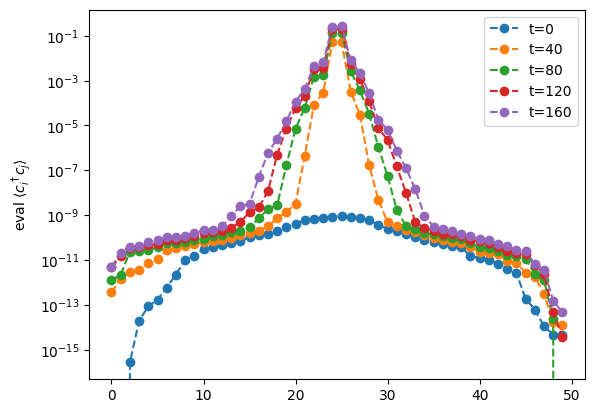

In [21]:
import matplotlib.pyplot as plt
import numpy as np


plt.ylabel('eval $ \\langle c_i^\dagger c_j \\rangle$')
plt.yscale('log')

L=50
for t in range(0,161,40):
    eval=np.loadtxt(f"star/L{L}/eval_L{L}_t{t}.txt")
    plt.plot([min(x,1-x) for x in eval], '--o', label=f't={t}')
plt.legend()

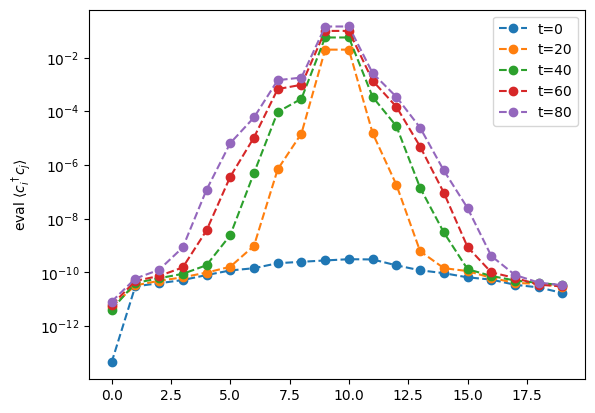

In [14]:
plt.ylabel('eval $ \\langle c_i^\dagger c_j \\rangle$')
plt.yscale('log')
L=20
for t in range(0,100,20):
    eval=np.loadtxt(f"star/L{L}/eval_L{L}_t{t}.txt")
    plt.plot([min(x,1-x) for x in eval], '--o', label=f't={t}')
plt.legend()